#Tutorial 6, Example 2

In [ ]:
import os
import pylab
import numpy as np
from PIL import Image
import torch
import torch.nn as nn
import torch.nn.functional as F

# Check the version of PyTorch
print(torch.__version__)

if not os.path.isdir('figures'):
    print('creating the figures folder')
    os.makedirs('figures')

2.0.1+cu118
creating the figures folder


In [ ]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Opening and Normalizing Image

In this section, we process an image to prepare it for further operations or model inference.

## Open Image (`img`)

- Using the `Image.open()` method from the PIL library, we open an image located at the specified path `'/content/drive/MyDrive/3wolfmoon.jpg'`.

## Normalize Image

- The image is then converted to a numpy array with data type `float32`.
- The pixel values of the image, which are originally in the range [0, 255], are divided by 256 to normalize them to the range [0, 1]. Normalizing image pixel values can help in improving the convergence speed and performance of neural networks.

- The shape of the image is printed using `print(img.shape)`, which will typically display `(height, width, channels)`.

## Convert to PyTorch Tensor (`img_tensor`)

- The numpy array is converted to a PyTorch tensor using `torch.tensor()`.
- The dimensions of the tensor are permuted using `.permute(2, 0, 1)`. This is done to change the order from `(height, width, channels)` to `(channels, height, width)`, which is the format expected by PyTorch's convolutional layers.
- An additional batch dimension is added using `.unsqueeze(0)`. This is necessary because many PyTorch operations, especially those in neural networks, expect a batch dimension.

- The shape of the resulting tensor is printed using `print(img_tensor.shape)`, which will display `(batch_size, channels, height, width)`.

By the end of this process, the image is ready to be passed through neural network models or other PyTorch operations.


In [ ]:
# Open image and normalize
img = Image.open('/content/drive/MyDrive/3wolfmoon.jpg')
img = np.asarray(img, dtype='float32') / 256.
print(img.shape)

(639, 516, 3)


In [ ]:
# Convert image to PyTorch tensor and add batch dimension
img_tensor = torch.tensor(img).permute(2, 0, 1).unsqueeze(0)
print(img_tensor.shape)

torch.Size([1, 3, 639, 516])


# Initializing Weights and Biases

In this section, we initialize the weights and biases for a convolutional layer using specific criteria to ensure effective training.

## Weights Initialization (`w`)

1. **Shape of Weights (`w_shape`)**:
    - The shape is defined as `(2, 3, 9, 9)`, which corresponds to:
        - 2 output channels (filters).
        - 3 input channels (assuming a 3-channel image like RGB).
        - 9x9 kernel size.

2. **Bound for Uniform Distribution (`w_bound`)**:
    - We calculate the bound using the formula `sqrt(number of input channels * height of kernel * width of kernel)`.
    - This results in `sqrt(3 * 9 * 9)`, which is used to define the range for the uniform distribution.

3. **Uniform Distribution**:
    - The weights are initialized using a uniform distribution in the range `[-1.0 / w_bound, 1.0 / w_bound]`.
    - Using a uniform distribution within these bounds helps in preventing any large weight values, which can lead to issues like exploding gradients during training.

## Biases Initialization (`b`)

- The biases are initialized to zeros for both filters using `torch.zeros()`.
- Initializing biases to zero is a common practice, as the effect of biases will be learned during the training process.

By following the above initialization strategy, we ensure that the weights and biases start from a reasonable range, which can aid in stable and efficient training of the neural network.


In [ ]:
# Initialize weights and biases
w_shape = (2, 3, 9, 9)
w_bound = np.sqrt(3 * 9 * 9)
w = torch.tensor(np.random.uniform(
                low=-1.0 / w_bound,
                high=1.0 / w_bound,
                size=w_shape),
            dtype=torch.float32)

b = torch.zeros(2, dtype=torch.float32)

In [ ]:
# Model definition
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        self.conv = nn.Conv2d(3, 2, 9, stride=1, padding=0)
        self.conv.weight.data = w
        self.conv.bias.data = b

    def forward(self, x):
        x1 = torch.sigmoid(self.conv(x))
        x2 = F.avg_pool2d(x1, kernel_size=5, stride=5, padding=0)
        return x1, x2

In [ ]:
# Model run
model = MyModel()
conv, pool = model(img_tensor)
print(conv.shape)
print(pool.shape)

torch.Size([1, 2, 631, 508])
torch.Size([1, 2, 126, 101])


# Converting Tensors to Numpy Arrays for Plotting

In this section, we convert PyTorch tensors back to numpy arrays. This conversion is often done to leverage various plotting libraries in Python that work with numpy arrays.

## Image Tensor Conversion (`img`)

1. **Remove Batch Dimension**:
    - `img_tensor.squeeze()`: This removes the batch dimension from the tensor. If the batch size is 1, this operation will reduce the tensor's dimensions by one.

2. **Reorder Dimensions**:
    - `.permute(1, 2, 0)`: This reorders the dimensions of the tensor to change it from `(channels, height, width)` to `(height, width, channels)`, which is the format expected by many image plotting functions.

3. **Convert to Numpy Array**:
    - `.numpy()`: This converts the PyTorch tensor to a numpy array.

## Convolutional Output Conversion (`conv`)

1. **Detach from Computation Graph**:
    - `conv.squeeze().detach()`: The `detach()` method creates a tensor that shares storage with the original tensor but does not require gradients. This is useful when we only want the data and not the gradient computations.

2. **Convert to Numpy Array**:
    - `.numpy()`: Converts the detached tensor to a numpy array.

## Pooling Output Conversion (`pool`)

1. **Detach from Computation Graph**:
    - `pool.squeeze().detach()`: Similar to the convolutional output, we detach the tensor from the computation graph.

2. **Convert to Numpy Array**:
    - `.numpy()`: Converts the detached tensor to a numpy array.

After these conversions, the tensors are now in a format suitable for plotting using libraries like `matplotlib` or any other visualization tool that works with numpy arrays.


In [ ]:
# Convert tensors back to numpy for plotting
img = img_tensor.squeeze().permute(1, 2, 0).numpy()
conv = conv.squeeze().detach().numpy()
pool = pool.squeeze().detach().numpy()

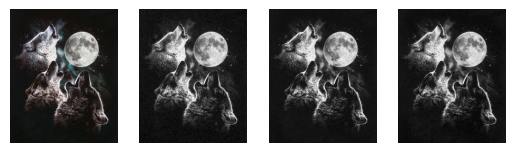

In [ ]:
# Plot the three channels of the image
pylab.figure()
pylab.subplot(1, 4, 1); pylab.axis('off'); pylab.imshow(img)
pylab.gray()
pylab.subplot(1, 4, 2); pylab.axis('off'); pylab.imshow(img[:, :, 0])
pylab.subplot(1, 4, 3); pylab.axis('off'); pylab.imshow(img[:, :, 1])
pylab.subplot(1, 4, 4); pylab.axis('off'); pylab.imshow(img[:, :, 2])
pylab.savefig('./figures/t6q2_1.png')

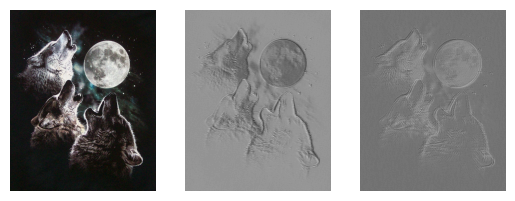

In [ ]:
# Plot original image and first and second components of conv output
pylab.figure()
pylab.subplot(1, 3, 1); pylab.axis('off'); pylab.imshow(img)
pylab.gray()
pylab.subplot(1, 3, 2); pylab.axis('off'); pylab.imshow(conv[0, :, :])
pylab.subplot(1, 3, 3); pylab.axis('off'); pylab.imshow(conv[1, :, :])
pylab.savefig('./figures/t6q2_2.png')

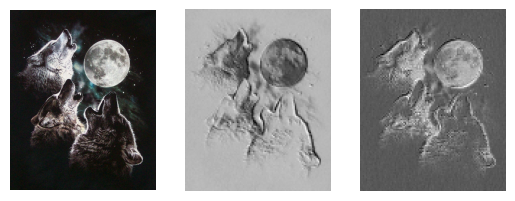

In [ ]:
# Plot original image and first and second components of pooling output
pylab.figure()
pylab.subplot(1, 3, 1); pylab.axis('off'); pylab.imshow(img)
pylab.gray()
pylab.subplot(1, 3, 2); pylab.axis('off'); pylab.imshow(pool[0, :, :])
pylab.subplot(1, 3, 3); pylab.axis('off'); pylab.imshow(pool[1, :, :])
pylab.savefig('./figures/t6q2_3.png')